In [12]:
import pandas as pd
data = pd.read_csv(r"C:\Users\admin\Desktop\COMPUTER&SOCIETY\Person_Gender_Height_Weight_Index.csv")
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [13]:
#calcolare l’indice di massa corporea (Body Mass Index – BMI). 
#BMI=peso (in kg.)/(altezza (in m.)^2
bmi_ds= pd.DataFrame(data, columns=['Gender', 'Height','Weight'])
bmi_ds

Es2_BMI= bmi_ds.to_csv()

In [14]:
#aggiungere colonna BMI
bmi_ds['BMI']=bmi_ds['Weight']/((bmi_ds['Height']/100)**2)
print(bmi_ds)
bmi_ds.csv= bmi_ds.to_csv()

     Gender  Height  Weight        BMI
0      Male     174      96  31.708284
1      Male     189      87  24.355421
2    Female     185     110  32.140248
3    Female     195     104  27.350427
4      Male     149      61  27.476240
..      ...     ...     ...        ...
495  Female     150     153  68.000000
496  Female     184     121  35.739603
497  Female     141     136  68.407022
498    Male     150      95  42.222222
499    Male     173     131  43.770256

[500 rows x 4 columns]


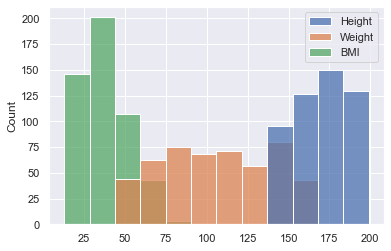

In [15]:
#grafici
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

#histplot
seaborn.histplot(data=bmi_ds)
plt.show()

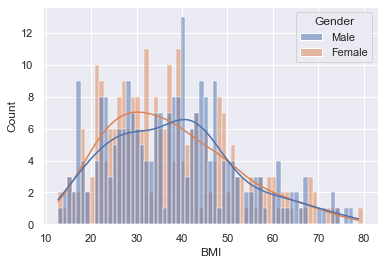

In [18]:
seaborn.histplot(data=bmi_ds, x="BMI", hue="Gender", bins=300, binwidth=1, kde="true")

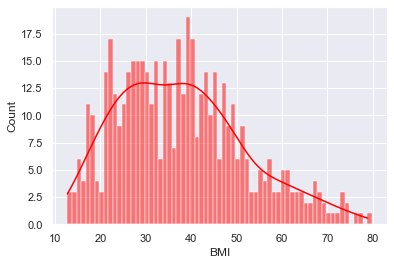

In [20]:
seaborn.histplot(data=bmi_ds, x="BMI", bins=300, binwidth=1, kde="true", color="red")

In [ ]:
#scatterplot
#sns.scatterplot(data=bmi_ds, x='Weight', y='Height')
plt.scatter(data=bmi_ds, x='Weight', y='Height')

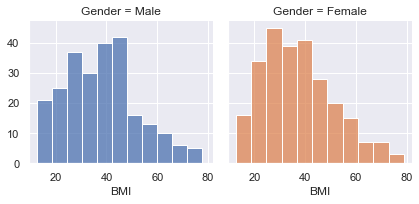

In [23]:
#creo griglia
g= seaborn.FacetGrid(bmi_ds, col="Gender", hue="Gender")
#decido che grafico applicare alla griglia
g.map(seaborn.histplot, "BMI")

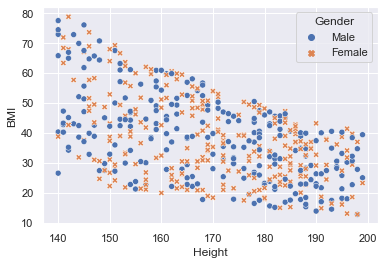

In [24]:
#come cambia BMI al variare dell'altezza
seaborn.scatterplot(data=bmi_ds, y="BMI", x="Height", hue="Gender", style="Gender")
#all'aumentare dell'altezza il BMI diminuisce

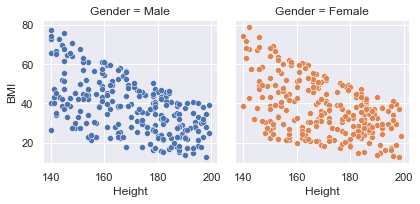

In [27]:
h= seaborn.FacetGrid(data=bmi_ds, col="Gender", hue="Gender")
h.map(seaborn.scatterplot, "Height", "BMI")

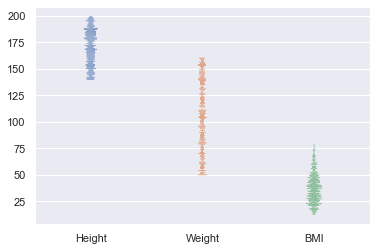

In [29]:
seaborn.swarmplot(data=bmi_ds, size=0.9)

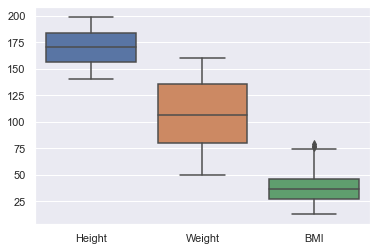

In [33]:
#boxplot
seaborn.boxplot(data=bmi_ds)

#seaborn.boxplot(data=bmi_ds, y="BMI", x="Weight") grafico incapibile, devo definire delle categorie

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

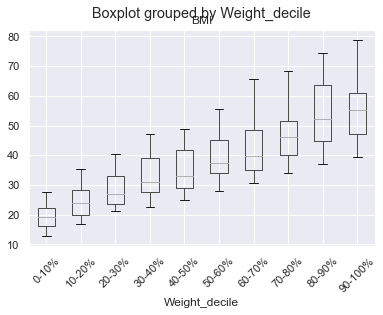

In [37]:
#boxplot con categorie

bmi_ds['Weight_decile'] = pd.qcut(bmi_ds['Weight'], 10, labels=['0-10%', '10-20%','20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
bmi_ds.boxplot(column='BMI', by='Weight_decile')
plt.xticks(rotation=45)